## Importing Packages

In [1]:
!pip install empiricaldist

  Created wheel for empiricaldist: filename=empiricaldist-0.3.9-cp36-none-any.whl size=10157 sha256=943fedc52284d4d92198788467bd386727351151e8525f132cebc8fc8a04b28b
  Stored in directory: /root/.cache/pip/wheels/bf/70/8c/55788f5a5806e6da295e5da80d2c0ef286d9a8260a1e3142e1
Successfully built empiricaldist


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from empiricaldist import Pmf, Cdf
from sklearn import preprocessing

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
nsfg = pd.read_hdf('/content/drive/My Drive/SAP Tech Know How ML 101/EDA ML course 2 assignment 1/nsfg.hdf5', 'nsfg')

In [5]:
nsfg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9358 entries, 0 to 9357
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   caseid        9358 non-null   int64  
 1   outcome       9358 non-null   int64  
 2   birthwgt_lb1  6485 non-null   float64
 3   birthwgt_oz1  6391 non-null   float64
 4   prglngth      9358 non-null   int64  
 5   nbrnaliv      6485 non-null   float64
 6   agecon        9358 non-null   int64  
 7   agepreg       9109 non-null   float64
 8   hpagelb       6485 non-null   float64
 9   wgt2013_2015  9358 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 804.2 KB


In [6]:
nsfg.head(10)

caseid  outcome  birthwgt_lb1  ...  agepreg  hpagelb  wgt2013_2015
0   60418        1           5.0  ...   2075.0     22.0   3554.964843
1   60418        1           4.0  ...   2358.0     25.0   3554.964843
2   60418        1           5.0  ...   3308.0     52.0   3554.964843
3   60419        6           NaN  ...      NaN      NaN   2484.535358
4   60420        1           8.0  ...   2266.0     24.0   2903.782914
5   60420        4           NaN  ...   3391.0      NaN   2903.782914
6   60423        1           5.0  ...   2433.0     23.0   2738.498331
7   60423        1           6.0  ...   2933.0     32.0   2738.498331
8   60426        4           NaN  ...   3258.0      NaN   9682.211381
9   60426        1           8.0  ...   3466.0     34.0   9682.211381

[10 rows x 10 columns]

In [7]:
nsfg.nunique()

caseid          3476
outcome            6
birthwgt_lb1      18
birthwgt_oz1      18
prglngth          48
nbrnaliv           4
agecon           368
agepreg          370
hpagelb           53
wgt2013_2015    3299
dtype: int64

In [8]:
#dummy = nsfg[nsfg.nbrnaliv == 8]
#dummy.head(10)
nsfg.isna().any()

caseid          False
outcome         False
birthwgt_lb1     True
birthwgt_oz1     True
prglngth        False
nbrnaliv         True
agecon          False
agepreg          True
hpagelb          True
wgt2013_2015    False
dtype: bool

In [9]:
nsfg.describe

<bound method NDFrame.describe of       caseid  outcome  birthwgt_lb1  ...  agepreg  hpagelb  wgt2013_2015
0      60418        1           5.0  ...   2075.0     22.0   3554.964843
1      60418        1           4.0  ...   2358.0     25.0   3554.964843
2      60418        1           5.0  ...   3308.0     52.0   3554.964843
3      60419        6           NaN  ...      NaN      NaN   2484.535358
4      60420        1           8.0  ...   2266.0     24.0   2903.782914
...      ...      ...           ...  ...      ...      ...           ...
9353   70615        1           4.0  ...   1825.0     22.0   8117.554461
9354   70616        1           8.0  ...   1816.0     18.0   6842.240477
9355   70616        1           7.0  ...   2158.0     23.0   6842.240477
9356   70619        1           8.0  ...   3525.0     31.0   3856.253532
9357   70619        1           8.0  ...   3758.0     34.0   3856.253532

[9358 rows x 10 columns]>

## Q1. In the NSFG dataset, the variable 'nbrnaliv' records the number of babies born alive at the end of a pregnancy.In the NSFG dataset, the variable 'nbrnaliv' records the number of babies born alive at the end of a pregnancy.

###Get the counts of all the possible values

In [10]:
nsfg['nbrnaliv'].value_counts()

1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64

In the 'nbrnaliv' column, replace the value 8, in place, with the special value NaNIn the 'nbrnaliv' column, replace the value 8, in place, with the special value NaN.

In [11]:
#code here
nsfg['nbrnaliv'].replace([8], np.nan, inplace=True)

Confirm that the value 8 no longer appears in this column by printing the values and their frequenciesConfirm that the value 8 no longer appears in this column by printing the values and their frequencies'''

In [12]:
#code here
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


## Q2. Compute a variable, For each pregnancy in the NSFG dataset, the variable 'agecon' encodes the respondent's age at conception, and 'agepreg' the respondent's age at the end of the pregnancy.Both variables are recorded as integers with two implicit decimal places, so the value 2575 means that the respondent's age was 25.Compute a variable

In [13]:
# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

In [14]:
agepreg.head(10)

0    20.75
1    23.58
2    33.08
3      NaN
4    22.66
5    33.91
6    24.33
7    29.33
8    32.58
9    34.66
Name: agepreg, dtype: float64

### What is the pregnency length and summary statistics ??

In [15]:
# Compute the difference
pregLen = agepreg - agecon 

# Compute summary statistics
pregLen.describe()

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64

## Q3. Plot a histogram for the conceived age with 20 bins and label the axes accordingly.

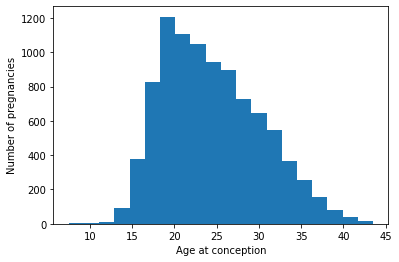

In [16]:
# Plot the histogram
plt.hist(agecon,bins=20)

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

## Q4. Make a Boolean Series called full_term that is true for babies with 'prglngth' greater than or equal to 37 weeks. Use full_term and birth_weight to select birth weight in pounds for full-term babies. Store the result in full_term_weight.

In [17]:
def resample_rows_weighted(df, column='finalwgt', seed=17):
    """Resamples a DataFrame using probabilities proportional to given column.

    df: DataFrame
    column: string column name to use as weights

    returns: DataFrame
    """
    np.random.seed(seed)
    weights = df[column] / sum(df[column])
    indices = np.random.choice(df.index, len(df), replace=True, p=weights)
    sample = df.loc[indices]
    return sample

In [18]:
# Resample the data
nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')

# Clean the weight variables (98, 99 are treated as invalid values)
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

# Compute total birth weight
birth_weight = pounds + ounces/16 # Resample the data

In [19]:
# Create a Boolean Series for full-term babies
full_term = nsfg.prglngth >=37

# Select the weights of full-term babies
full_term_weight = birth_weight[full_term]

# Compute the mean weight of full-term babies
print(full_term_weight.mean())

7.392597951914515


## Q5. The distribution of weight is also different for multiple births, like twins and triplets. In this exercise, you'll filter them out, too, and see what effect it has on the mean.

Use the variable 'nbrnaliv' to make a Boolean Series that is True for single births (where 'nbrnaliv' equals 1) and False otherwise.

Use Boolean Series and logical operators to select single, full-term babies and compute their mean birth weight.

For comparison, select multiple, full-term babies and compute their mean birth weight.

In [20]:
# Filter full-term babies
full_term = nsfg.prglngth >=37

# Filter single births (nbrnaliv == 1)
single = nsfg.nbrnaliv == 1

# Compute mean birth weight for single full-term babies
single_full_term_weight = birth_weight[single & full_term]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[~single & full_term]
print('Multiple full-term mean:', mult_full_term_weight.mean())

Single full-term mean: 7.40297320308299
Multiple full-term mean: 5.784722222222222


## Q6. Now let's plot a PMF for the age of the respondents in the GSS dataset. The variable 'age' contains respondents' age in years.

In [21]:
gss = pd.read_hdf('/content/drive/My Drive/SAP Tech Know How ML 101/EDA ML course 2 assignment 1/gss.hdf5', 'gss')

In [22]:
gss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62466 entries, 0 to 62465
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     62466 non-null  int64  
 1   age      62281 non-null  float64
 2   cohort   62282 non-null  float64
 3   sex      62466 non-null  int64  
 4   race     62466 non-null  int64  
 5   educ     62304 non-null  float64
 6   realinc  55499 non-null  float64
 7   gunlaw   40550 non-null  float64
 8   grass    36222 non-null  float64
 9   wtssall  62466 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 5.2 MB


In [23]:
gss.head(10)

year   age  cohort  sex  race  educ  realinc  gunlaw  grass  wtssall
0  1972  26.0  1946.0    1     1  18.0  13537.0     2.0    NaN   0.8893
1  1972  38.0  1934.0    2     1  12.0  18951.0     1.0    NaN   0.4446
2  1972  57.0  1915.0    1     1  12.0  30458.0     1.0    NaN   1.3339
3  1972  61.0  1911.0    2     1  14.0  37226.0     1.0    NaN   0.8893
4  1972  59.0  1913.0    1     1  12.0  30458.0     2.0    NaN   0.8893
5  1972  46.0  1926.0    1     1   8.0  18951.0     2.0    NaN   0.8893
6  1972  43.0  1929.0    2     2   8.0   2707.0     1.0    NaN   0.8893
7  1972  72.0  1900.0    2     2  12.0   8122.0     NaN    NaN   0.8893
8  1972  85.0  1887.0    1     1  16.0  30458.0     2.0    NaN   0.8893
9  1972  44.0  1928.0    1     1  12.0  24366.0     1.0    NaN   0.8893

In [ ]:
# Normalize age column manually in below steps
#min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
#age_scaled = min_max_scaler.fit_transform(gss[['age']])

# Run the normalizer on the dataframe
#age_normalized = pd.DataFrame(age_scaled) #returns an array not a df


In [ ]:
#print(age_normalized)

              0
0      0.112676
1      0.281690
2      0.549296
3      0.605634
4      0.577465
...         ...
62461  0.197183
62462  0.605634
62463  0.690141
62464  0.549296
62465  0.535211

[62466 rows x 1 columns]


18.0    0.005620
19.0    0.019878
20.0    0.018111
21.0    0.019219
22.0    0.020247
          ...   
85.0    0.002360
86.0    0.001927
87.0    0.001702
88.0    0.001413
89.0    0.003773
Name: age, Length: 72, dtype: float64


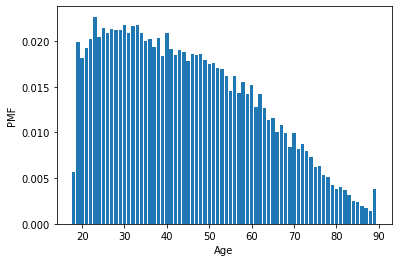

In [24]:
#pmf = Pmf.from_seq(age_normalized[0], normalize = false)
#print(pmf)
#pmf_age.bar(label='age')

# Label the axes
#plt.xlabel('Age')
#plt.ylabel('PMF')
#plt.show()

#or directly normalize and find pmf using:

# Select the age column
age = gss['age']

# Make a PMF of age
pmf_age = Pmf.from_seq(age, normalize = True)
print(pmf_age)
# Plot the PMF
pmf_age.bar(label='age')

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()


## Q7. What percentage of the respondents in the GSS dataset are OLDER than 30?

In [36]:
# Select the age column

#print(len(gss[gss['age'] >=30])) #47820 
#print(len(gss['age'])) #62466
#print(47820/62466 *100) #76.55

# Compute the CDF of age
cdf_age = Cdf.from_seq(gss['age'])

# Calculate the CDF of 30
print(1-cdf_age[30])

#print the percentage of the represendents age older than 30 
print((1 - cdf_age[30]) * 100)

0.7460862863473612
74.60862863473612


## Q8. Compute the IQR value of the real income.

In [33]:
# Select the age column
income = gss['realinc']

# Compute the CDF of age
cdf_income = Cdf.from_seq(income)


In [34]:
# Calculate the 75th percentile 
np.percentile(gss.realinc.sort_values().dropna(),75)

percentile_75th = cdf_income.inverse(0.75)

# Calculate the 25th percentile
percentile_25th = cdf_income.inverse(0.25)

# Calculate the interquartile range
iqr = percentile_75th - percentile_25th

# Print the interquartile range
print(iqr)

29676.0
